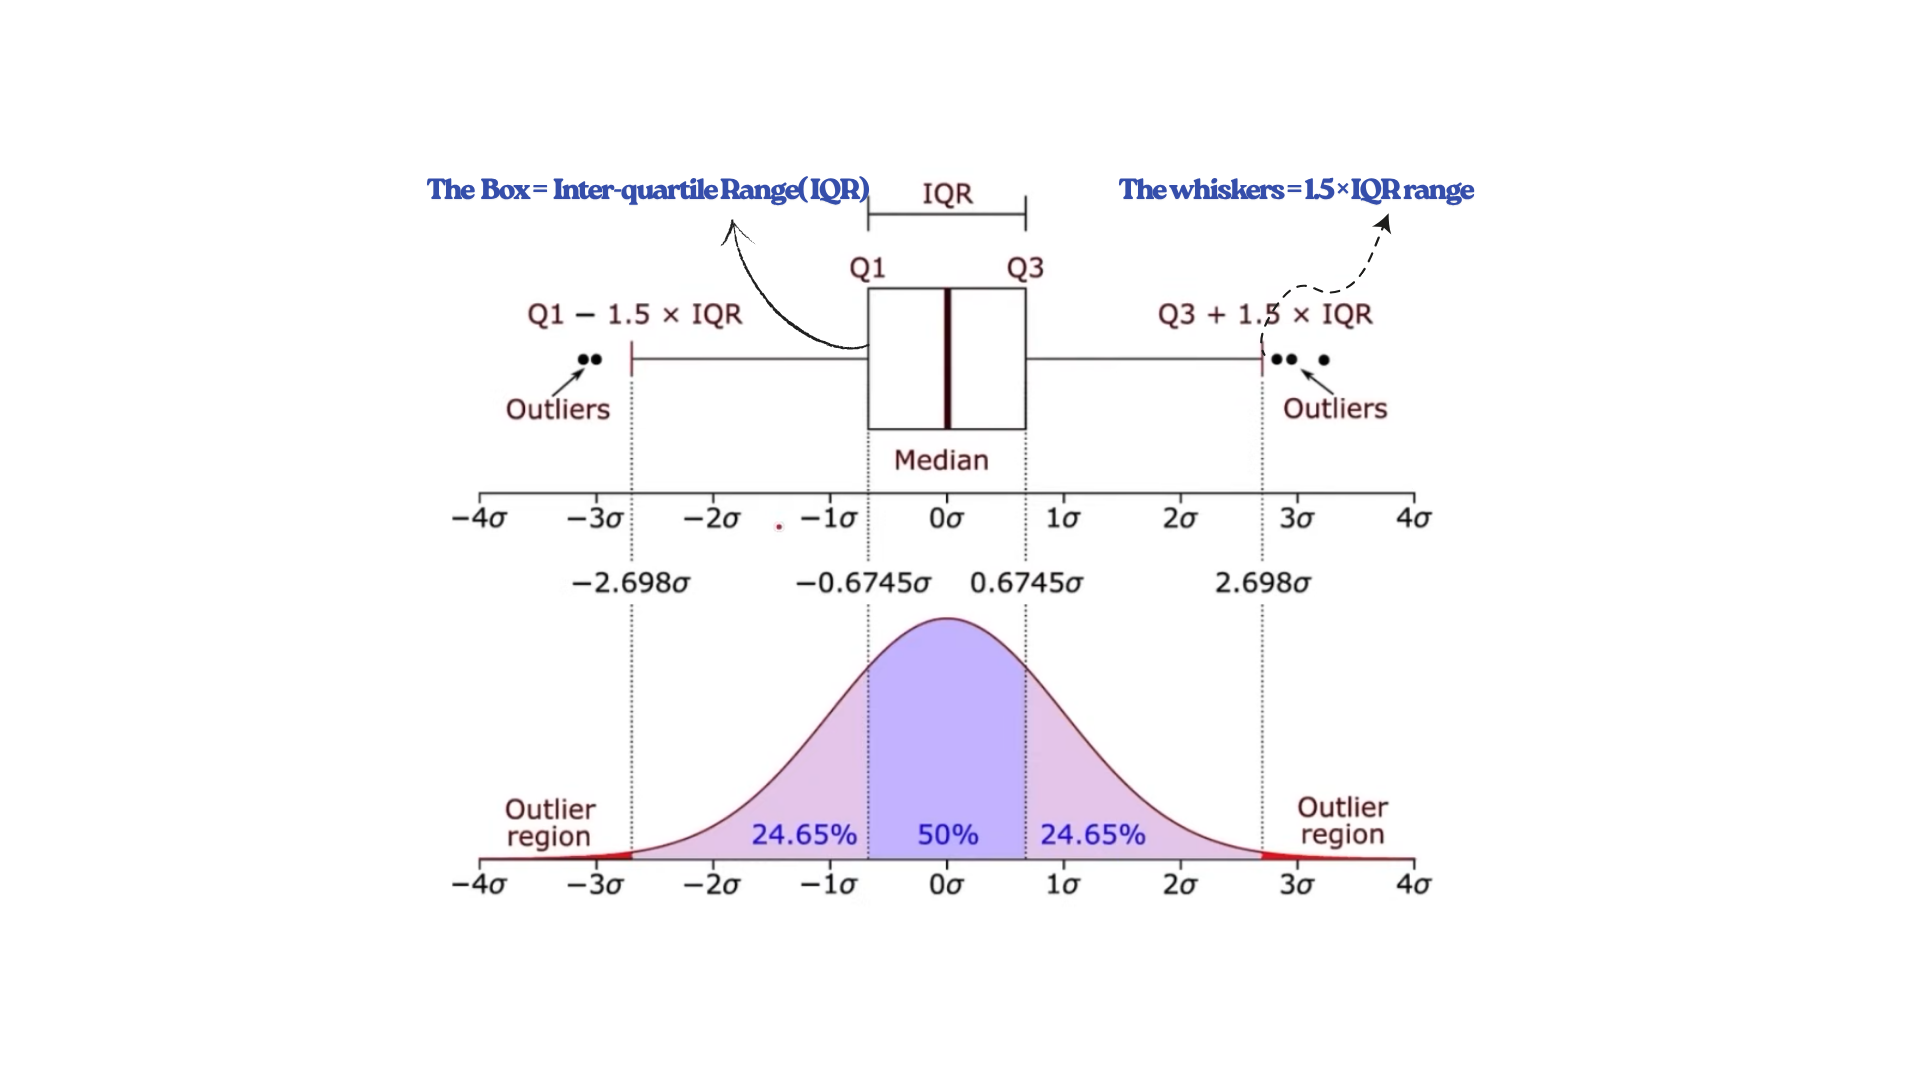

# 🧩 1. What are Outliers?

- **Outliers** are data points that are **significantly different** from most of the other observations.
  
- In case if data follows the **Normal Distribution** and the tail of that data in graphical format **stretches beyond** the **boundary or expected limit of the distribution, often defined by standard deviations (σ) from the mean (μ)**. shows that data contains the **outliers** because of which the data has become **skew**

- Example:
In the dataset [20, 22, 21, 23, 25, 1000] — 1000 is an outlier.

- They can **skew** your analysis and models, especially models sensitive to distance or variance (like Linear Regression, KNN, etc.).

# ⚙️ 2. Why Outliers Occur

##### Outliers can appear due to:

- **Data entry errors** (e.g., typing 1000 instead of 10)

- **Measurement errors** (faulty sensors)

- **Natural variation** (rare but valid cases)

- **Sampling errors**

- **Fraudulent activity** (like unusually high transactions)

# 🎯 3. Effects of Outliers


| Impact                            | Description                                  |
| --------------------------------- | -------------------------------------------- |
| **Mean distortion**               | Pulls the average in their direction         |
| **Increased variance**            | Raises standard deviation                    |
| **Wrong statistical conclusions** | Affects correlation, regression coefficients |
| **Model instability**             | ML models may fit wrong patterns             |


# 🔍 4. Detection of Outliers

### **(A) Using Visualization**

##### 1. **Boxplot**

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
dataset = pd.read_csv("loan_data_set.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [70]:
dataset.describe()

# Coapplication show min value as zero but its max value and 41667 which is quite large
# from the perspective that it has 1610 as mean, meaning there is a possiblity of outliers

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


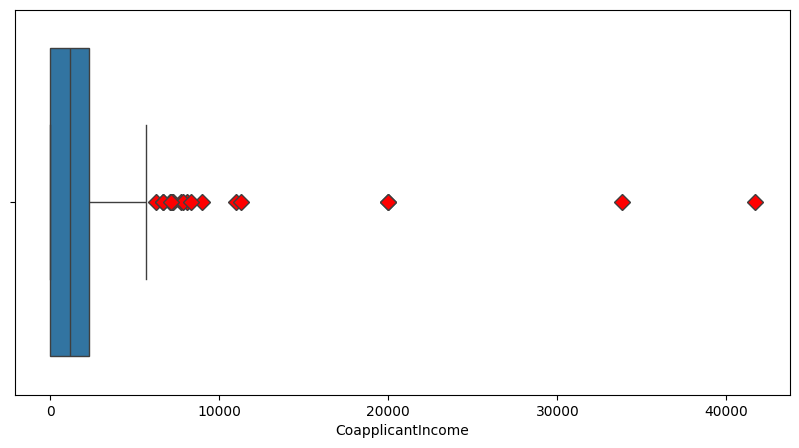

In [71]:
plt.figure(figsize=(10,5))

sns.boxplot(
    x= "CoapplicantIncome",
    data = dataset,
    flierprops =  dict(marker = "D", markersize = 8, markerfacecolor = 'red'),

    
    )
plt.show()

#### 📊 The boxplot shows:

- The **box** = Interquartile Range (IQR)

- The **whiskers** = 1.5 × IQR range

- Points **outside whiskers** = **Outliers**

#### 2. **Distribution Plot** 

/tmp/ipykernel_16823/4246328762.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome"])


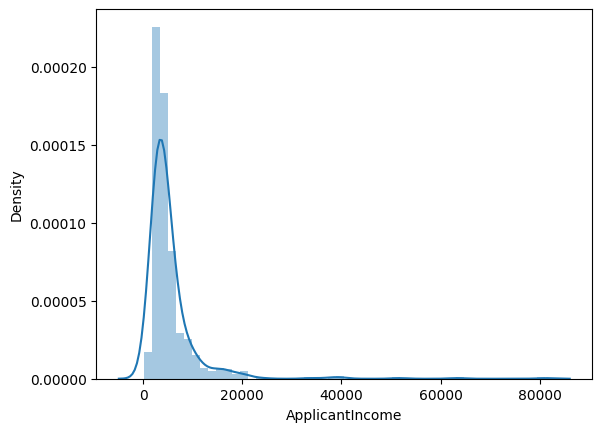

In [72]:
sns.distplot(dataset["ApplicantIncome"])
plt.show()


# 📊 🌟🌟🌟 Explanation of **`sns.histplot()`** Parameters

| **Parameter** | **Description**                   | **Detailed Explanation**                                                                                                                                                                                                                         |
| ------------- | --------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| `data`        | Input dataset                     | The dataset (usually a Pandas DataFrame) from which Seaborn will take the column(s) to plot. Here, `dataset` contains the feature `ApplicantIncome`.                                                                                             |
| `x`           | Column name for x-axis            | Specifies which column from the DataFrame will be plotted on the x-axis. In this case, `"ApplicantIncome"` is the variable whose distribution we’re visualizing.                                                                                 |
| `kde`         | Kernel Density Estimate line      | If `True`, overlays a smooth curve (KDE) over the histogram, showing an estimate of the probability density function (PDF) of the variable. Helps visualize the distribution shape more clearly.                                                 |
| `stat`        | Defines the type of normalization | Determines what the histogram’s y-values represent. Options include: `"count"`, `"frequency"`, `"density"`, and `"probability"`. Using `"density"` means the total area under the histogram equals **1**, making it comparable to the KDE curve. |
| `kde_kws`     | KDE customization                 | A dictionary to pass additional arguments to the KDE plot. <br>Here: `dict(cut=3)` extends the KDE curve **3 bandwidths** beyond the extreme data points to better capture tails of the distribution.                                            |
| `alpha`       | Transparency level                | Controls the opacity of the histogram bars (range: `0` = fully transparent, `1` = fully opaque). Here `0.5` gives a semi-transparent effect to better visualize overlapping elements (like the KDE line).                                        |
| `edgecolor`   | Color of bar borders              | Defines the color of the edges (borders) of the histogram bars. The tuple `(1, 1, 1, 0)` represents RGBA (Red, Green, Blue, Alpha). Here, alpha = 0 makes edges invisible (no visible border).                                                   |
| `bins`        | Number of bins (intervals)        | Controls how many intervals (bars) the data range is divided into. A higher number (like `50`) makes bars narrower and the distribution smoother; a lower number makes it coarser.                                                               |



#### 🌟 **In seaborn.histplot, the parameter kde_kws = dict(cut = 3) is used to control how far the Kernel Density Estimate (KDE) curve extends beyond the observed range of the data.**

#### 🌟 **cut: This parameter within kde_kws determines how much the KDE curve is "cut off" at the tails. The value 3 (or any positive number) means the KDE curve will extend 3 times the bandwidth beyond the minimum and maximum data points.**

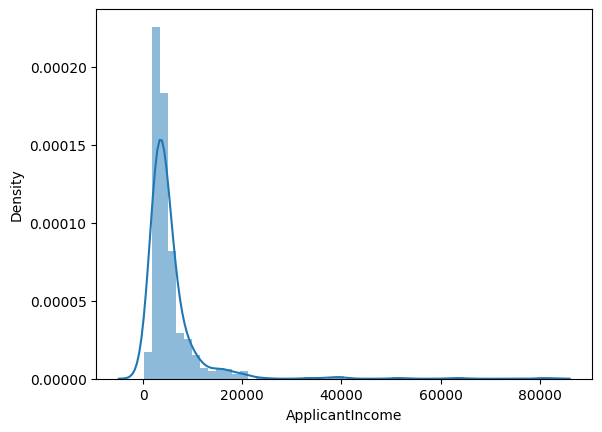

In [73]:
sns.histplot(
    data = dataset,
    x="ApplicantIncome",
    kde=True,
    stat="density",
    kde_kws=dict(cut = 3),
    alpha = 0.5,
    edgecolor = (1, 1, 1, 0),
    bins = 50
    
    )
plt.show()

#### 3. Scatter Plot

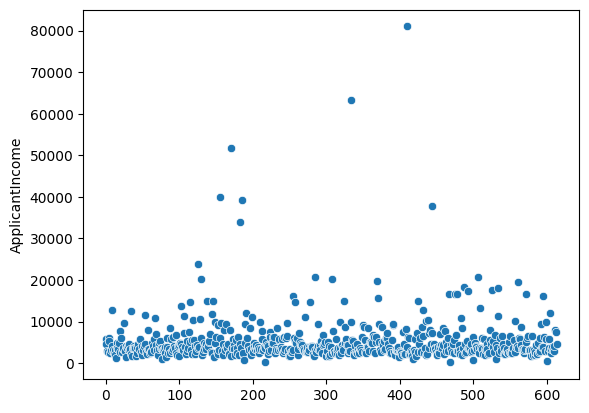

In [74]:
sns.scatterplot(
    x=range(len(dataset)), 
    y = "ApplicantIncome", 
    data = dataset,
    
    )
plt.show()

# 🧠 5. **Handling Outliers**

#### (A) **Remove Outliers**

##### When:

- The outliers are **data entry errors**

- The dataset is **large**

## ➡️ 🌟 🌟 🌟 Using InterQuartile Method to Remove the Outliers

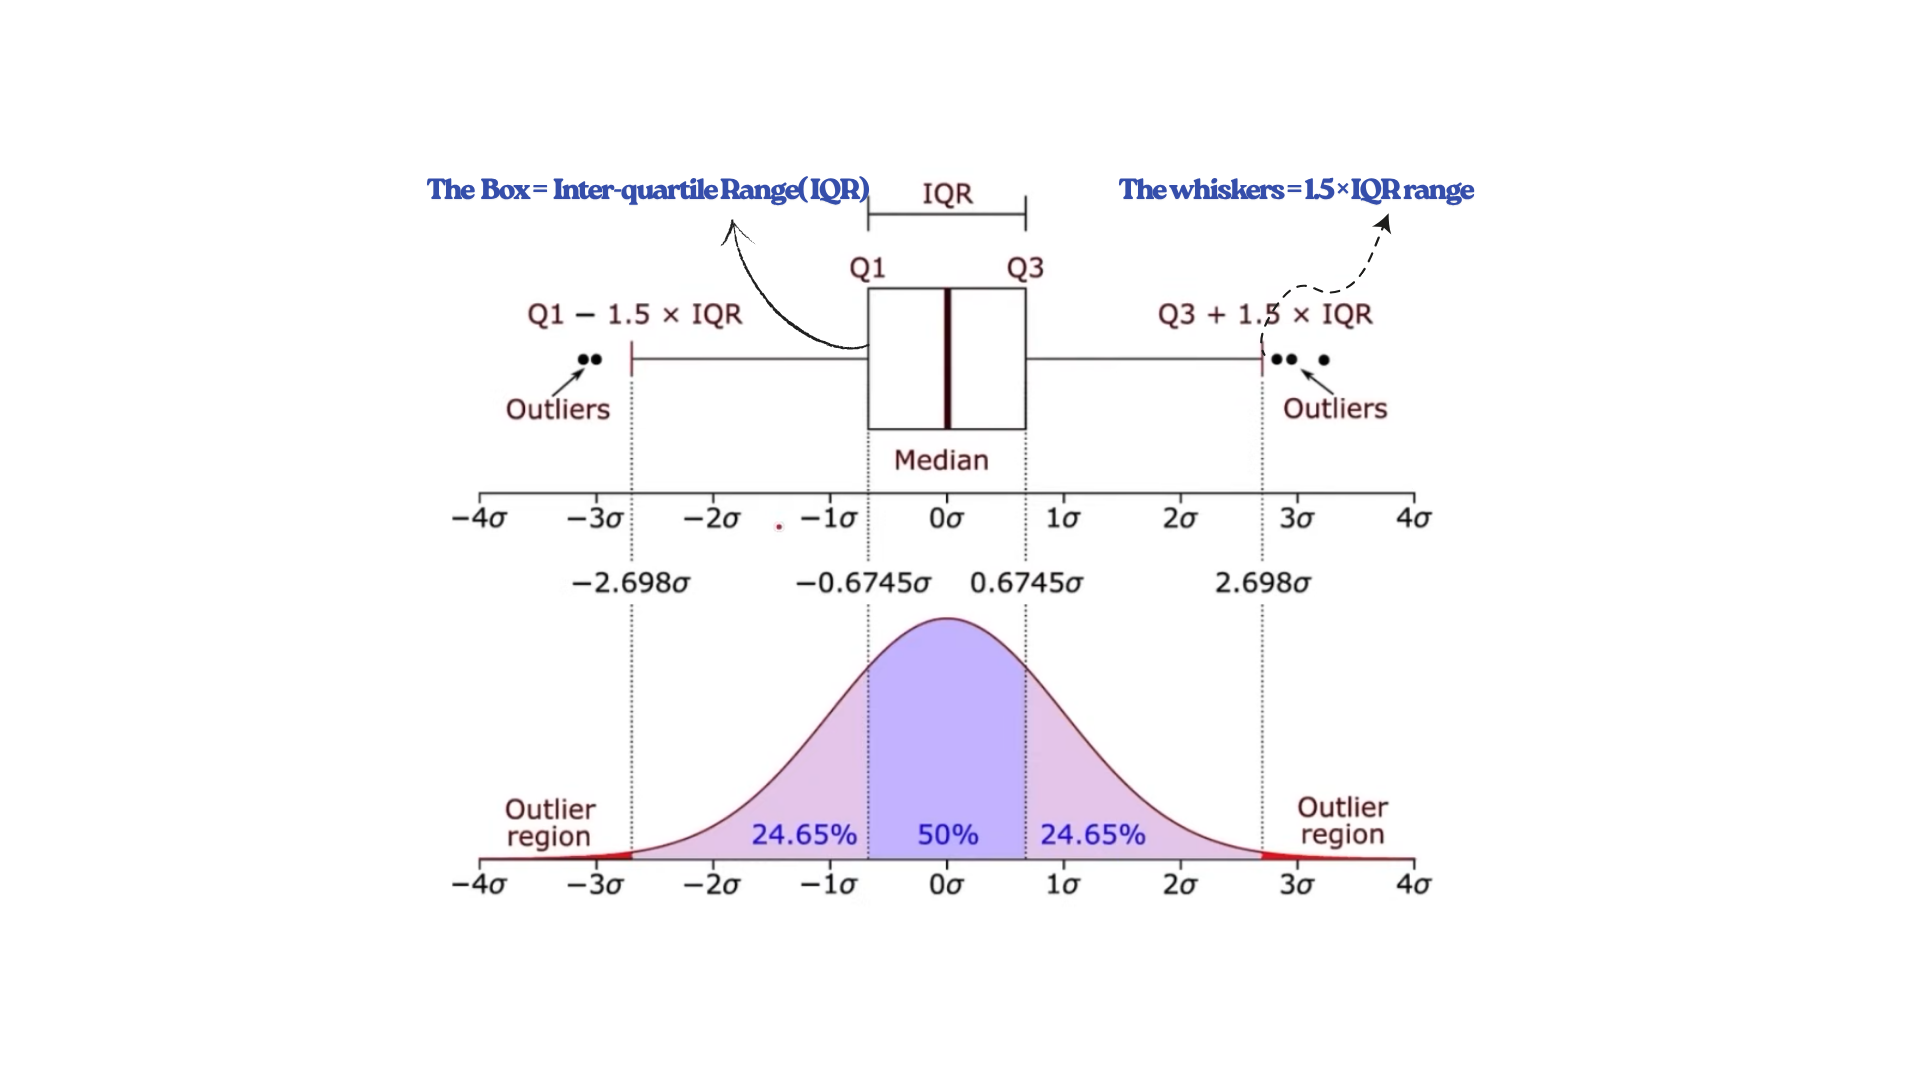

### 🧮 Formula of Interquartile Range (IQR)

#### **`IQR=Q3​−Q1`**

##### Where:

- **Q₁ (First Quartile)** = 25th percentile (value below which 25% of data lies)

- **Q₃ (Third Quartile)** = 75th percentile (value below which 75% of data lies)

<hr>

### 📊 So basically:

- **Q1 → Lower quartile** (cuts off lowest 25%)

- **Q3 → Upper quartile** (cuts off lowest 75%)

- **IQR → Middle 50% spread** of your dataset

<hr>

### 💡 Why it’s important

- **IQR measures statistical dispersion** — how “spread out” the central 50% of data is.

- It’s **robust to outliers**, unlike variance or standard deviation.
  
<hr>

### 🧠 Formula in terms of data:

#### **If data is sorted:**

#### 𝑄1 = Median of lower half of data

#### 𝑄3 ​= Median of upper half of data

### **IQR=Q3​−Q1​**

<hr>

### Outlier Detection using IQR
#### Once you have IQR:

#### Lower Bound = Q1​ − 1.5 x IQR

#### Upper Bound = Q3​ + 1.5 × IQR

#### Any data point:

- `< Lower Bound → Low outlier`

- `> Upper Bound → High outlier`

## 🌟🌟 Quantile Vs Quartile 

- **Quantile**: A **q-quantile divides a dataset into q equal-sized portions** **where q = number of value passed** in the **`.quantile([value,passed,in,the,list,form])`.** The **`quantile`** function in Python is a general tool that can find any division of the data you specify. You provide a fractional value between 0 and 1 to define the cut point
    
    - **What Quantile Is**: A **q-quantile** (the specific value you pass, like 0.25) is the boundary value in the dataset. It tells you the data point below which a certain percentage of the observations fall.

        - Example: The 0.25 quantile (the 1st quartile) is the value that separates the bottom 25% of the data from the top 75%.
  
    - **What Quantile Does**: The Quantile Method (when used to find multiple cut-points) is used to divide the data into q equal portions or groups.
  
        - The **(q − 1)** quantile values (cut-points) collectively create q equal portions of the dataset.
  
- **Quartile**: A 4-quantile, which divides data into four parts. The three cut points that create the quartiles are the 0.25, 0.5, and 0.75 quantiles. 

- If Functions built around the concept of "quartile" would only ever be able to divide data into four parts 

#### ➡️ This generality means you can use the same **`quantile()`** function to find: 

- **Quartiles** by passing [0.25, 0.5, 0.75].

- **Deciles** (10 equal parts) by passing [0.1, 0.2, ..., 0.9].

- **Percentiles** (100 equal parts) by passing a decimal value like 0.99.

- **Quintiles** (5 equal parts) by passing [0.2, 0.4, 0.6, 0.8].

- The **median** (the 2-quantile) by passing 0.5

In [75]:
dataset.shape

(614, 13)

In [76]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
print(f"q1 : {q1}\nq3: {q3}")

q1 : 0.0
q3: 2297.25


In [77]:
IQR = q3 - q1

In [78]:
lower_bound = q1 - (1.5*IQR)
upper_bound = q3 + (1.5*IQR)

print(f"Lower Bound : {lower_bound}\nUpper Bound : {upper_bound}")

Lower Bound : -3445.875
Upper Bound : 5743.125


#### ☝️ **since we have gotten our lower bound in negative and we don't have any data in negative we can disregard lower bound and solely use upper bound to find the Outliers**

In [79]:
# statistical method to show the outlier : iqr

outliers_iqr = dataset[(dataset["CoapplicantIncome"] < lower_bound) | (dataset["CoapplicantIncome"] > upper_bound)]
outliers_iqr

# Below are the outliers of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
38,LP001114,Male,No,0,Graduate,No,4166,7210.0,184.0,360.0,1.0,Urban,Y
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
135,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
180,LP001633,Male,Yes,1,Graduate,No,6400,7250.0,180.0,360.0,0.0,Urban,N
253,LP001843,Male,Yes,1,Not Graduate,No,2661,7101.0,279.0,180.0,1.0,Semiurban,Y
349,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural,Y
372,LP002201,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural,Y


In [80]:
new_dataset = dataset[dataset["CoapplicantIncome"] <= upper_bound]

new_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [81]:
new_dataset.shape

(596, 13)

In [82]:
print(f"Total {614 - 596} rows are less than the original data\ncause they were containing the outliers")

Total 18 rows are less than the original data
cause they were containing the outliers


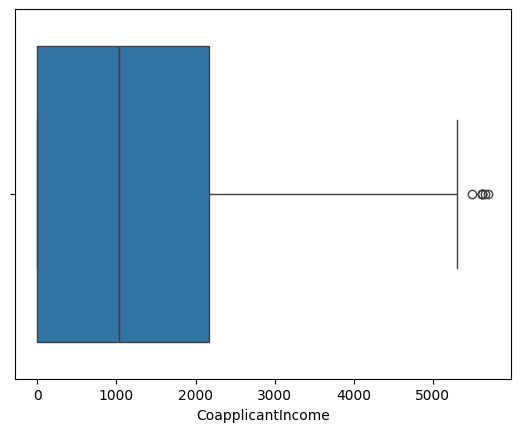

In [83]:
sns.boxplot(x = "CoapplicantIncome", data = new_dataset)
plt.show()

#### ☝️ this much outliers are not going to effect the linear regression that much overall generalisation will be good, we don't remove all the outliers from the dataset because it results in the loss of the data 

# ⭐⭐⭐ **Outlier Handling : By Using Capping/Winsorizing**

### Instead of removing, **limit** values to the threshold range.

### For this we will need **`np.where(condition, value, condition, value, columnName)`**

#### 📘 Explanation:

##### **`np.where(condition, value_if_true, value_if_false)`** for this method we need  **numpy**

##### **Replaces extreme values with nearest bound**

##### **You cannot omit the value_if_false argument in np.where — it’s required. If you want to “leave the value unchanged”, you must explicitly pass the original column/array as the value_if_false.**

#### normal usage of **`np.where()`**
``` python
    df['Age_Capped'] = np.where(df['Age'] > upper_bound,
                            upper_bound,      # replace if above upper_bound
                            df['Age'])        # keep original if not

```

#### nested **`np.where()`**

```python
    df['Age_Capped'] = np.where(df['Age'] > upper_bound, upper_bound,
                            np.where(df['Age'] < lower_bound, lower_bound, df['Age']))

```



/home/akash/myEnv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 19.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/akash/myEnv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


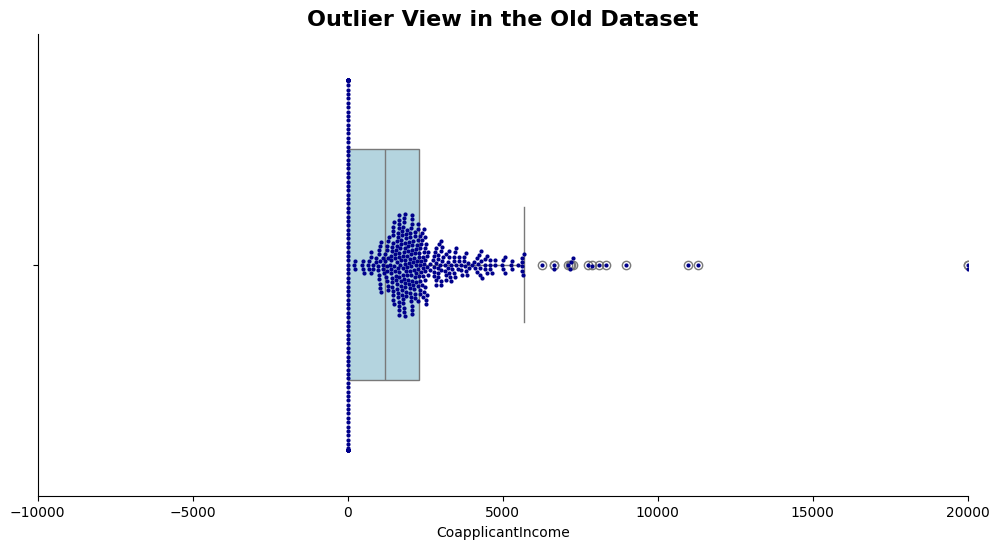

In [84]:
# first show the outliers in the old dataset
plt.figure(figsize = (12,6))
plt.xlim(left = -10000, right = 20000)
plt.title("Outlier View in the Old Dataset", fontweight = "bold", fontsize= 16)
sns.boxplot(
    x = "CoapplicantIncome",
    data = dataset,
    color = 'lightblue',
    width = 0.5,
    zorder = 1)

sns.swarmplot(
    x = "CoapplicantIncome",
    data = dataset,
    color = 'darkblue',
    size = 3,
    zorder = 2
)

sns.despine()
plt.show()

In [85]:
import numpy as np
dataset1 = dataset.copy(deep = True)

In [ ]:
# now applying the capping using the above given method by np.where

dataset["CoapplicantIncome"] = np.where(dataset['CoapplicantIncome'] > upper_bound, upper_bound,
                                        np.where(dataset['CoapplicantIncome'] < lower_bound, lower_bound, dataset["CoapplicantIncome"]))

# a freindly reminder don't pass a pandas dataframe in np.where as np is all about series

In [87]:
dataset[dataset["CoapplicantIncome"] > upper_bound]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


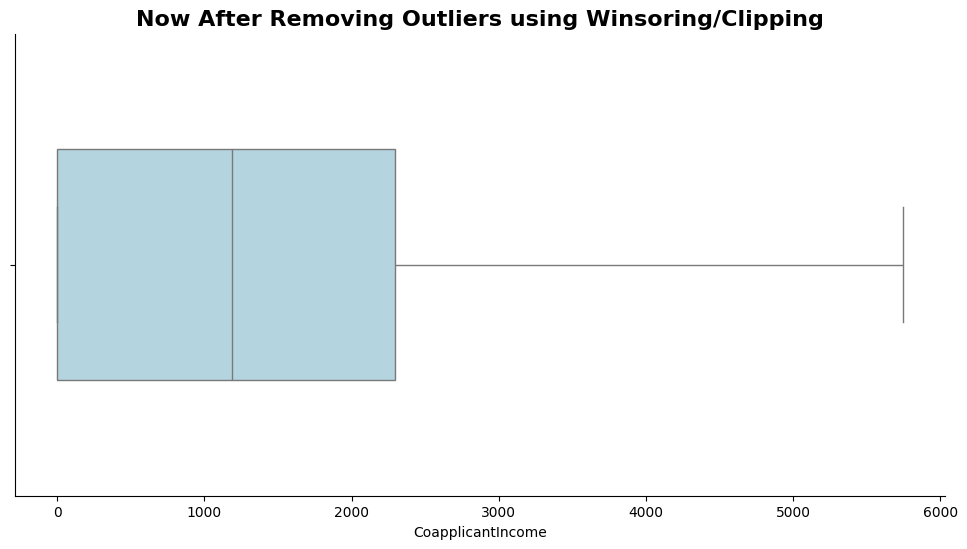

In [88]:
# now checking for the outliers
plt.figure(figsize = (12,6))
plt.title("Now After Removing Outliers using Winsoring/Clipping", fontweight = 'bold', fontsize = 16)
sns.boxplot(
    x = "CoapplicantIncome",
    data = dataset,
    width = 0.5,
    color = 'lightblue',
)
sns.despine()
plt.show()

# 🌟🌟🌟 **Better, clearer and faster alternative**

### **This directly caps values to the bounds and is vectorized & fast.**

```python
    df['Age_Capped'] = df['Age'].clip(lower=lower_bound, upper=upper_bound)
```


In [89]:
dataset1["CoapplicantIncome"] = dataset1["CoapplicantIncome"].clip(lower = lower_bound, upper = upper_bound)

/home/akash/myEnv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 19.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/akash/myEnv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


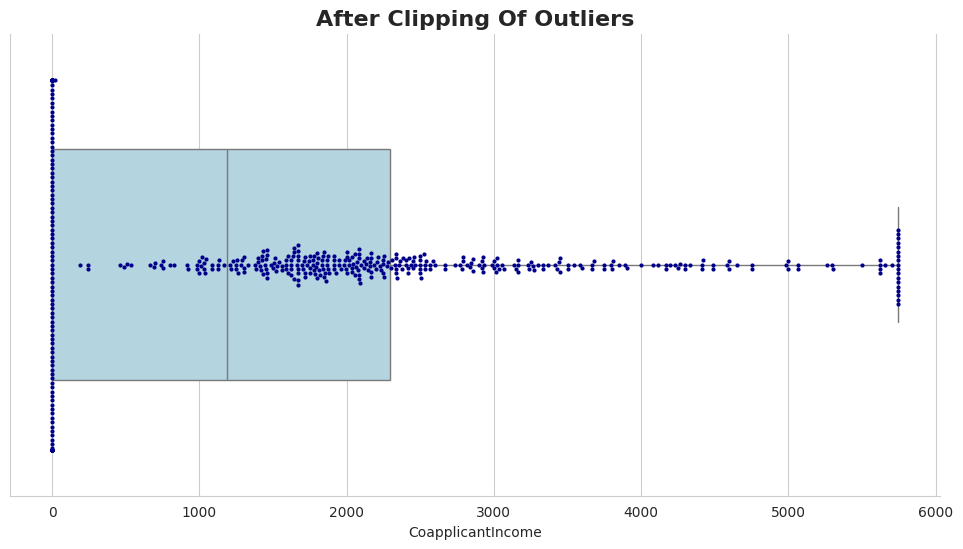

In [91]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
plt.title("After Clipping Of Outliers",fontsize= 16, fontweight = 'bold')


sns.boxplot(
    x = "CoapplicantIncome",
    data = dataset1,
    width = 0.5,
    color = 'lightblue',
    zorder = 1
)

sns.swarmplot(
    x = "CoapplicantIncome",
    data = dataset1,
    size = 3,
    color = "darkblue",
    zorder = 2
)

sns.despine()
plt.show()